<a href="https://colab.research.google.com/github/BEST-PK/DPDM2024/blob/main/DPDM2024_CH8_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import pandas as pd
import numpy as np

# Get Data

In [83]:
# prompt: load kdd99 dataset using sklearn

from sklearn.datasets import fetch_kddcup99

kdd99 = fetch_kddcup99()
# Access the data and target variables
X= kdd99.data
Y = kdd99.target

# You can then use the data and target variables for your machine learning tasks.
# For example, you might want to create a pandas DataFrame for easier manipulation:
# df = pd.DataFrame(data, columns=kdd99.feature_names)
# df['target'] = target


In [84]:
X

array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       ...,
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object)

In [85]:
Y

array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
       b'normal.'], dtype=object)

# **ตรวจสอบการกระจายของ target**

In [86]:
# prompt: count number of unique class in target

unique_classes = np.unique(Y)
num_unique_classes = len(unique_classes)
print(f"Number of unique classes in target: {num_unique_classes}")


Number of unique classes in target: 23


In [87]:
unique_classes

array([b'back.', b'buffer_overflow.', b'ftp_write.', b'guess_passwd.',
       b'imap.', b'ipsweep.', b'land.', b'loadmodule.', b'multihop.',
       b'neptune.', b'nmap.', b'normal.', b'perl.', b'phf.', b'pod.',
       b'portsweep.', b'rootkit.', b'satan.', b'smurf.', b'spy.',
       b'teardrop.', b'warezclient.', b'warezmaster.'], dtype=object)

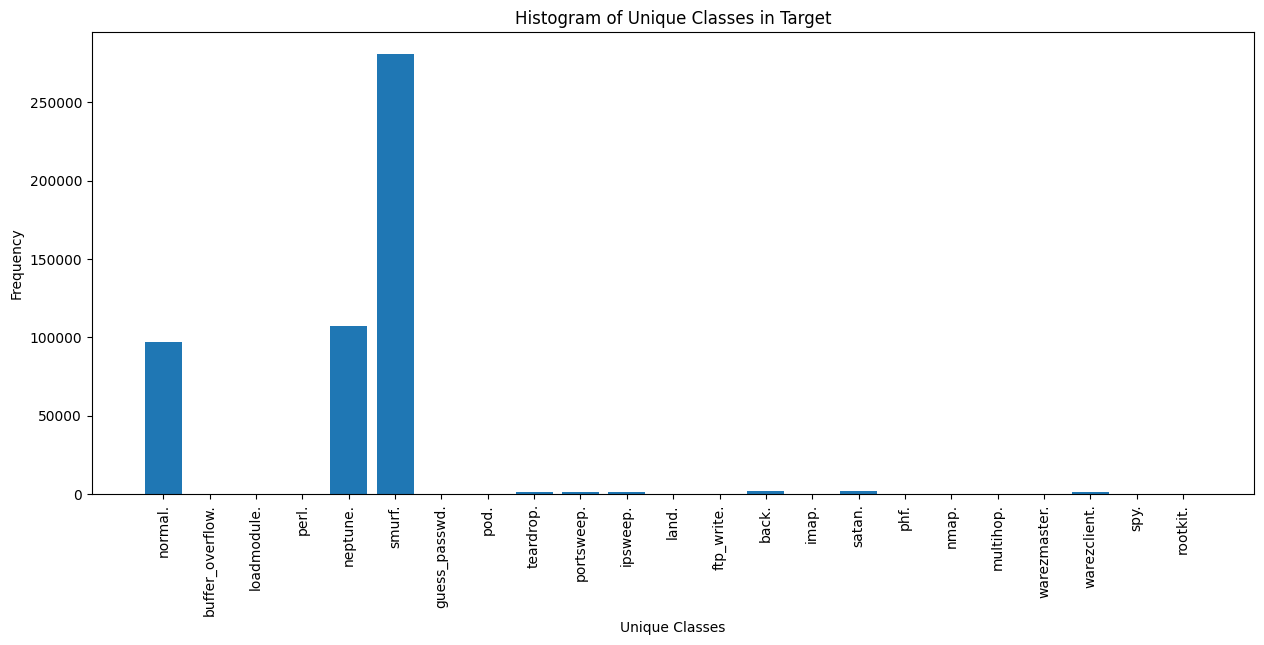

In [88]:
# prompt: plot histogram of the unique_classes and show label unique_classes

import matplotlib.pyplot as plt

# Count the occurrences of each unique class
class_counts = {}
for label in Y:
  if label not in class_counts:
    class_counts[label] = 0
  class_counts[label] += 1

# Extract class labels and counts for plotting
labels = list(class_counts.keys())
counts = list(class_counts.values())

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(labels, counts)
plt.xlabel("Unique Classes")
plt.ylabel("Frequency")
plt.title("Histogram of Unique Classes in Target")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


# **Setting Class**

**กำหนด target เป็น  3 class คือ normal ,neptune, amurf**

In [89]:
# prompt: combi x and y to dataframe
df = pd.DataFrame(X, columns=kdd99.feature_names)
df['target'] = Y
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'http',b'SF',310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.0,0.01,0.0,0.0,b'normal.'
494017,0,b'tcp',b'http',b'SF',282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,b'normal.'
494018,0,b'tcp',b'http',b'SF',203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,b'normal.'
494019,0,b'tcp',b'http',b'SF',291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,b'normal.'


In [90]:
# prompt: show target

print(df['target'])


0         b'normal.'
1         b'normal.'
2         b'normal.'
3         b'normal.'
4         b'normal.'
             ...    
494016    b'normal.'
494017    b'normal.'
494018    b'normal.'
494019    b'normal.'
494020    b'normal.'
Name: target, Length: 494021, dtype: object


In [91]:
# prompt: chang  dtype Y  to text
Y = Y.astype(str)

In [92]:
# prompt: chang target dryly in df to text

df['target'] = df['target'].astype(str)


In [93]:
# prompt: split the dataset in df into 3 tables by normal.neptune, amurf

df_normal = df[df['target'] ==  'normal.']
df_neptune = df[df['target'] == 'neptune.']
df_smurf = df[df['target'] == 'smurf.']


In [94]:
df_normal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'http',b'SF',310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.0,0.01,0.0,0.0,normal.
494017,0,b'tcp',b'http',b'SF',282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.
494018,0,b'tcp',b'http',b'SF',203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,b'tcp',b'http',b'SF',291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [95]:
df_neptune

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
7601,0,b'tcp',b'telnet',b'S0',0,0,0,0,0,0,...,6,1.0,0.0,0.2,0.33,1.0,0.83,0.0,0.0,neptune.
7602,0,b'tcp',b'telnet',b'S0',0,0,0,0,0,0,...,16,1.0,0.0,0.07,0.12,1.0,0.94,0.0,0.0,neptune.
53583,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,neptune.
53584,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,8,0.73,0.27,0.09,0.0,1.0,1.0,0.0,0.0,neptune.
53585,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,17,0.81,0.14,0.05,0.0,1.0,1.0,0.0,0.0,neptune.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486878,0,b'tcp',b'smtp',b'S0',0,0,0,0,0,0,...,136,0.46,0.01,0.01,0.01,0.99,0.52,0.0,0.0,neptune.
486879,0,b'tcp',b'telnet',b'S0',0,0,0,0,0,0,...,83,0.51,0.01,0.01,0.0,0.99,0.98,0.0,0.0,neptune.
486880,0,b'tcp',b'telnet',b'S0',0,0,0,0,0,0,...,93,0.54,0.01,0.01,0.0,0.99,0.98,0.0,0.0,neptune.
486881,0,b'tcp',b'smtp',b'S0',0,0,0,0,0,0,...,135,0.44,0.01,0.01,0.01,0.99,0.6,0.0,0.0,neptune.


In [96]:
df_smurf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
7793,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.0,0.0,0.0,0.0,0.0,smurf.
7794,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.0,0.0,0.0,0.0,0.0,smurf.
7795,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.0,0.0,0.0,0.0,0.0,smurf.
7796,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,33,0.19,0.02,0.19,0.0,0.0,0.0,0.0,0.0,smurf.
7797,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,43,0.23,0.02,0.23,0.0,0.0,0.0,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490860,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
490861,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
490862,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
490863,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


# **Split data for Train & Test**

In [97]:
# prompt: sampling 10% from each (df_normal, df_neptune,df_smurf) and concatenate them into test daraframe. and concatenate the rest into training dataframe

# Sample 10% from each DataFrame
df_normal_sample = df_normal.sample(frac=0.1, random_state=42)
df_neptune_sample = df_neptune.sample(frac=0.1, random_state=42)
df_smurf_sample = df_smurf.sample(frac=0.1, random_state=42)

# Concatenate the samples into a test DataFrame
df_test = pd.concat([df_normal_sample, df_neptune_sample, df_smurf_sample])

# Remove the sampled rows from the original DataFrames to create the training DataFrame
df_normal_train = df_normal.drop(df_normal_sample.index)
df_neptune_train = df_neptune.drop(df_neptune_sample.index)
df_smurf_train = df_smurf.drop(df_smurf_sample.index)

# Concatenate the remaining rows into a training DataFrame
df_train = pd.concat([df_normal_train, df_neptune_train, df_smurf_train])

# Print the shapes of the resulting DataFrames
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)


Shape of df_train: (436742, 42)
Shape of df_test: (48527, 42)


### **ชุดข้อมูลสำหรับ Train**

In [98]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490860,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
490861,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
490862,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
490863,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


### **ชุดข้อมูลสำหรับ Test**

In [99]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
84672,0,b'tcp',b'http',b'SF',200,563,0,0,0,0,...,255,1.0,0.0,0.12,0.03,0.0,0.02,0.0,0.0,normal.
104569,0,b'tcp',b'http',b'SF',167,1578,0,0,0,0,...,255,1.0,0.0,0.5,0.08,0.0,0.0,0.0,0.0,normal.
147646,0,b'tcp',b'smtp',b'SF',2030,332,0,0,0,0,...,170,0.71,0.05,0.01,0.01,0.0,0.0,0.0,0.0,normal.
37376,0,b'tcp',b'http',b'SF',339,2037,0,0,0,0,...,255,1.0,0.0,0.02,0.04,0.0,0.0,0.0,0.0,normal.
4166,0,b'udp',b'domain_u',b'SF',44,69,0,0,0,0,...,215,0.84,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236939,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
428495,0,b'icmp',b'ecr_i',b'SF',520,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
317482,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
424967,0,b'icmp',b'ecr_i',b'SF',520,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


# **Cross Validation**


## **sklearn.model_selection.KFold**

การทำงานของ KFold:




1. แบ่งข้อมูลออกเป็น n_splits fold
2. ในแต่ละรอบหนึ่ง fold จะถูกใช้สำหรับการทดสอบ (test set) และ fold ที่เหลือจะถูกใช้สำหรับการฝึก (train set)
3. กระบวนการนี้จะวนไปเรื่อย ๆ จนครบ n_splits รอบ ซึ่งทำให้ข้อมูลทุกส่วนถูกใช้ทั้งในการฝึกและทดสอบอย่างน้อยหนึ่งครั้ง

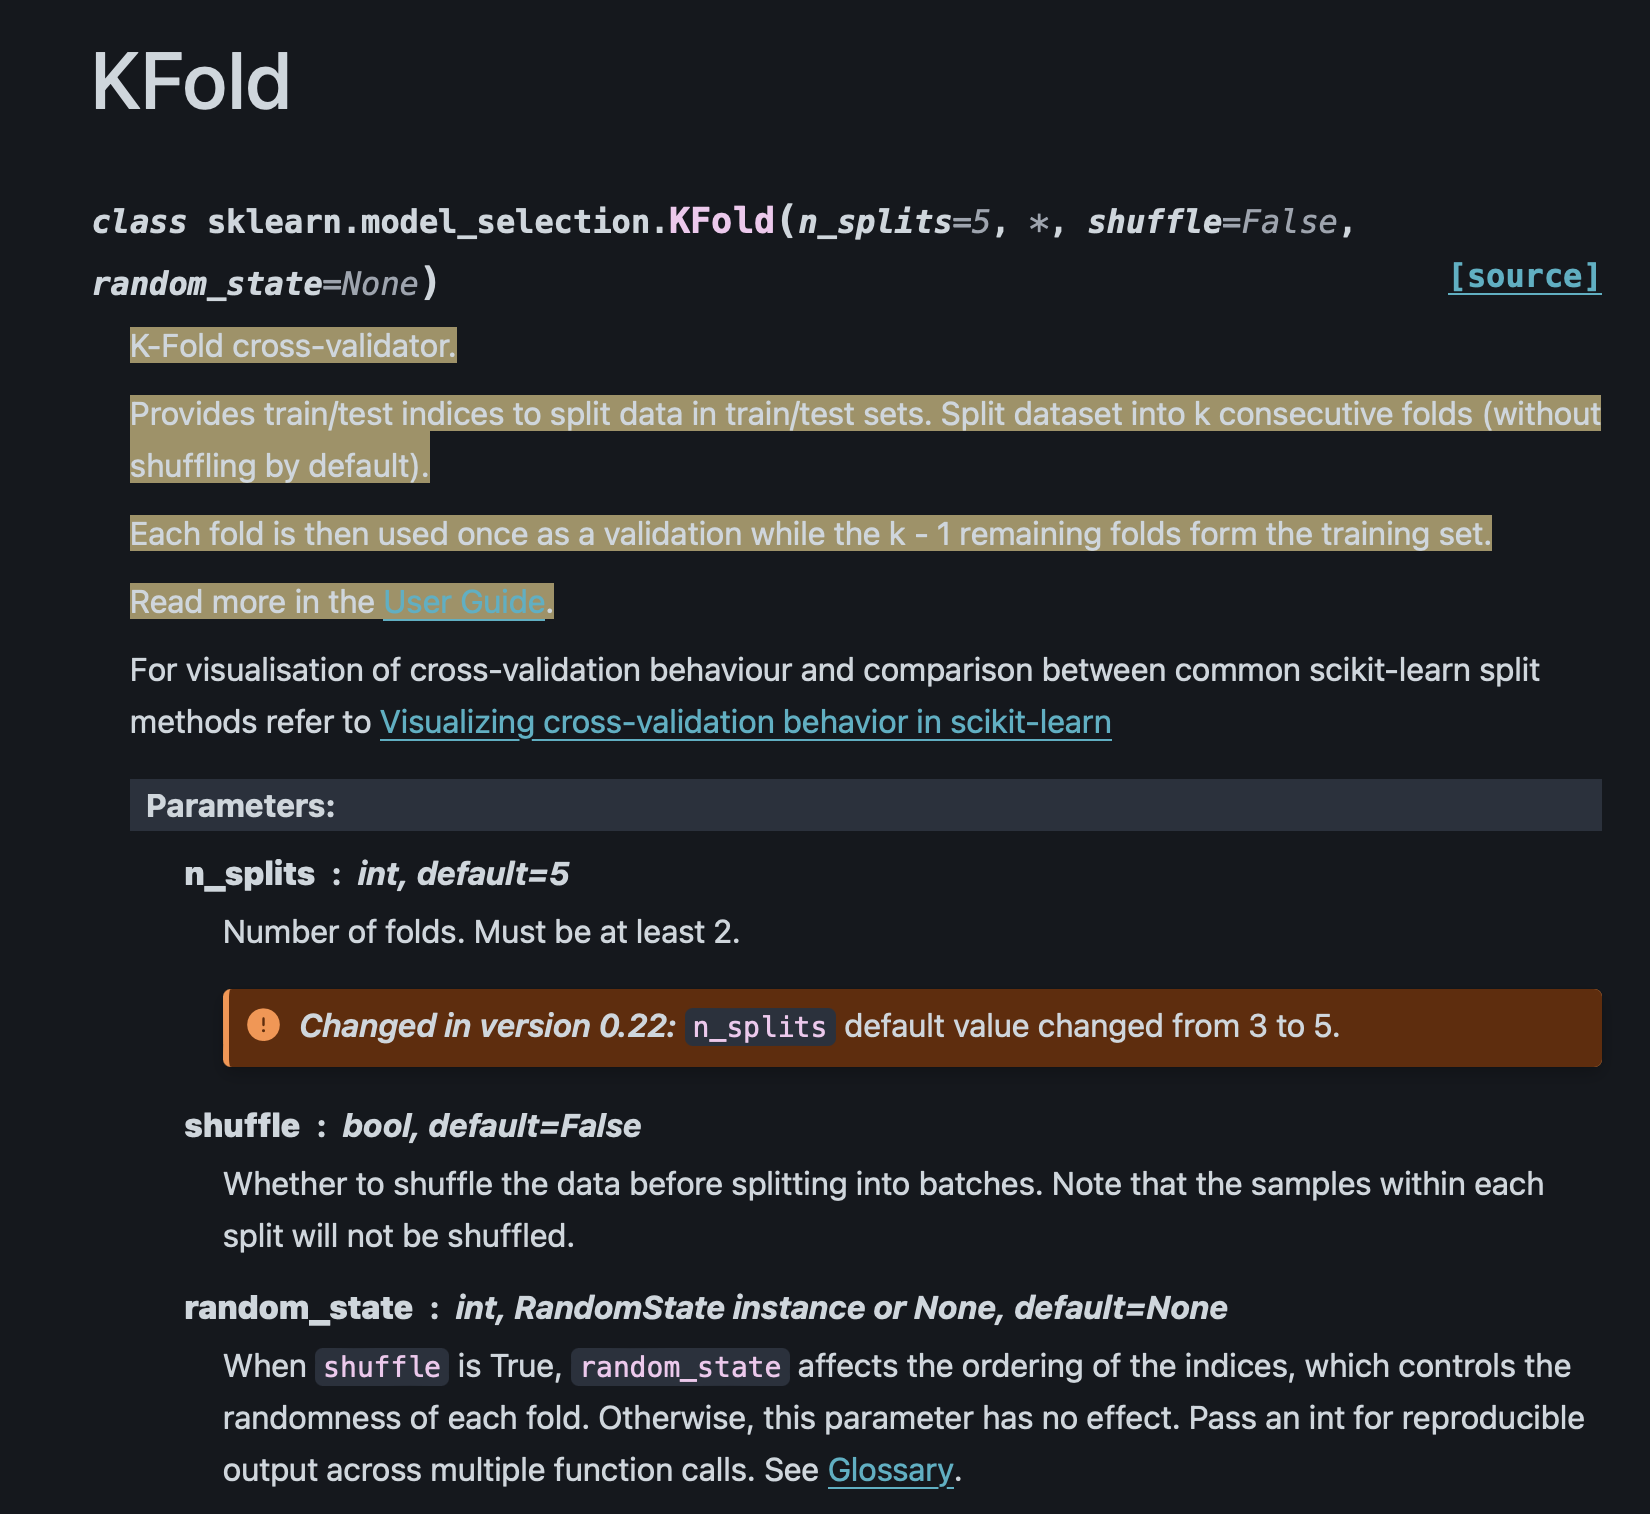

## HW3
ทำ 3-fold cross Validation โดยการสร้าง column ใหม่และใส่ชื่อ fold

In [100]:
print("Shape of df_train:", df_train.shape[0])
print("Shape of df_normal_train:", df_normal_train.shape[0])
print("Shape of df_neptune_train:",df_neptune_train.shape[0])
print("Shape of df_smurf_train:",df_smurf_train.shape[0])


Shape of df_train: 436742
Shape of df_normal_train: 87550
Shape of df_neptune_train: 96481
Shape of df_smurf_train: 252711


In [101]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490860,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
490861,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
490862,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
490863,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [102]:
# prompt: Shuffle rows in df_train by randomly
df_cross_validation  = df_train.sample(frac=1).reset_index(drop=True)
df_cross_validation

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,14,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
1,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,15,0.06,0.08,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
3,1,b'tcp',b'smtp',b'SF',917,338,0,0,0,0,...,101,0.39,0.09,0.01,0.02,0.01,0.01,0.0,0.0,normal.
4,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436737,0,b'icmp',b'ecr_i',b'SF',520,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
436738,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
436739,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,10,0.04,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
436740,0,b'tcp',b'http',b'SF',231,4073,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.


In [105]:
# สร้างลำดับ [1, 2, 3] ที่วนซ้ำจนถึงขนาดของ DataFrame
df_cross_validation['fold'] = np.tile([1, 2, 3], len(df_cross_validation) // 3 + 1)[:len(df_cross_validation)]

คำอธิบาย:

np.tile([1, 2, 3], len(df_cross_validation) // 3 + 1):

*   ใช้ np.tile() เพื่อทำการซ้ำลำดับ [1, 2, 3]
จนมีความยาวเพียงพอสำหรับจำนวนแถวใน shuffled_df
*   len(shuffled_df) // 3 + 1 คำนวณจำนวนครั้งที่ต้องซ้ำลำดับ [1, 2, 3] เพื่อให้ยาวเกินพอสำหรับจำนวนแถวของ shuffled_df

[:len(shuffled_df)]: ตัดลำดับที่สร้างขึ้นให้มีขนาดพอดีกับจำนวนแถวใน shuffled_df

In [106]:
df_cross_validation

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,fold
0,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,0.05,0.07,0.0,0.0,1.0,1.0,0.0,0.0,neptune.,1
1,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,0.06,0.08,0.0,0.0,1.0,1.0,0.0,0.0,neptune.,2
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,3
3,1,b'tcp',b'smtp',b'SF',917,338,0,0,0,0,...,0.39,0.09,0.01,0.02,0.01,0.01,0.0,0.0,normal.,1
4,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436737,0,b'icmp',b'ecr_i',b'SF',520,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,1
436738,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,2
436739,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,0.04,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.,3
436740,0,b'tcp',b'http',b'SF',231,4073,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.,1


In [107]:
df_cross_validation.groupby('fold')['target'].value_counts()

fold  target  
1     smurf.      84191
      neptune.    32266
      normal.     29124
2     smurf.      84045
      neptune.    32198
      normal.     29338
3     smurf.      84475
      neptune.    32017
      normal.     29088
Name: count, dtype: int64